In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_original = pd.read_csv('./Flight Price Prediction/Clean_Dataset.csv')
df_original.drop(df_original.columns[0], axis=1, inplace=True)
df_original.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


            duration         price
days_left                         
1          14.250228  21591.867151
2          14.111080  30211.299801
3          14.287476  28976.083569
4          13.742667  25730.905653
5          12.921970  26679.773368
6          12.497056  24856.493902
7          12.596291  25588.367351
8          12.419870  24895.883995
9          12.787071  25726.246072
10         12.737475  25572.819134
11         12.135395  22990.656070
12         12.099147  22505.803322
13         12.075509  22498.885384
14         12.149146  22678.002363
15         12.116650  21952.540852
16         12.238158  20503.546237
17         12.317543  20386.353949
18         12.099414  19987.445168
19         12.007038  19507.677375
20         12.027527  19699.983390
21         11.940556  19430.494058
22         12.011075  19590.667385
23         11.997194  19840.913451
24         12.203346  19803.908896
25         11.963771  19571.641791
26         11.993014  19238.290278
27         11.959575

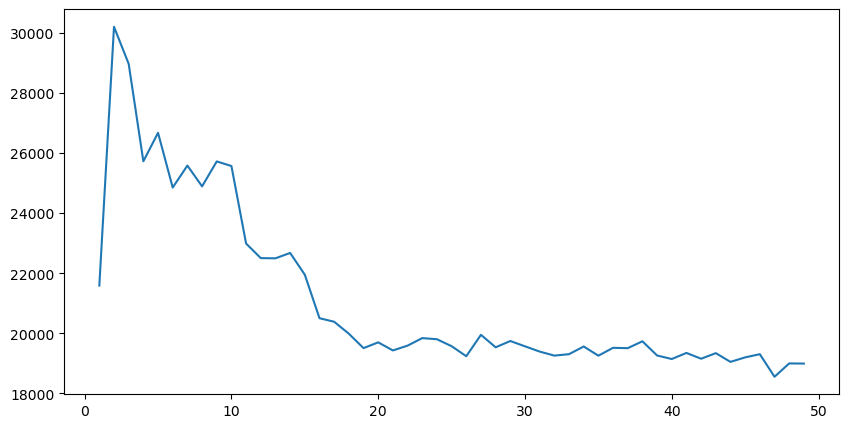

In [12]:
#1. days_left 대비 가격 선 그래프
df1 = df_original.select_dtypes('number')
df1 = df1.groupby('days_left').mean()
print(df1)

plt.figure(figsize = (10,5))
plt.plot(df1['price'])
plt.show()

                  price
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302


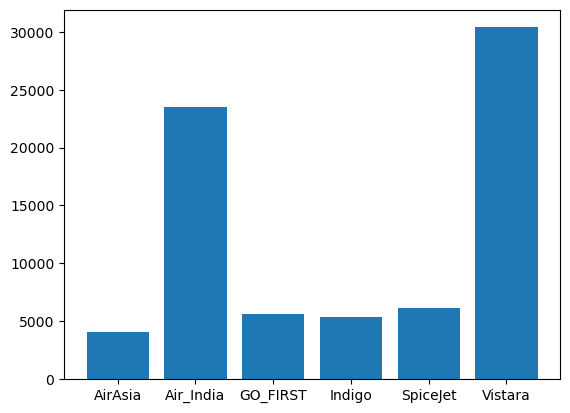

In [16]:
#2. barplot - 항공사별 평균 가격
df_original.head(3)
df2 = df_original[['airline', 'price']].groupby('airline').mean()
print(df2)

plt.figure()
plt.bar(x = df2.index, height = df2['price'])
plt.show()

departure_time
Afternoon        47794
Early_Morning    66790
Evening          65102
Late_Night        1306
Morning          71146
Night            48015
Name: airline, dtype: int64


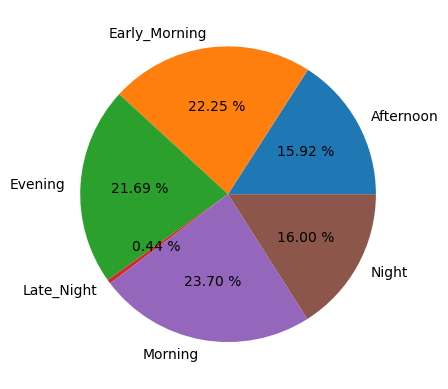

In [22]:
#3. pie plot - 출발 시간에 따른 항공권 개수 비율
df_original.head(3)
df3 = df_original.groupby('departure_time').count()['airline']
print(df3)

plt.figure()
plt.pie(x = df3, labels=df3.index, autopct='%.2f %%')
plt.show()

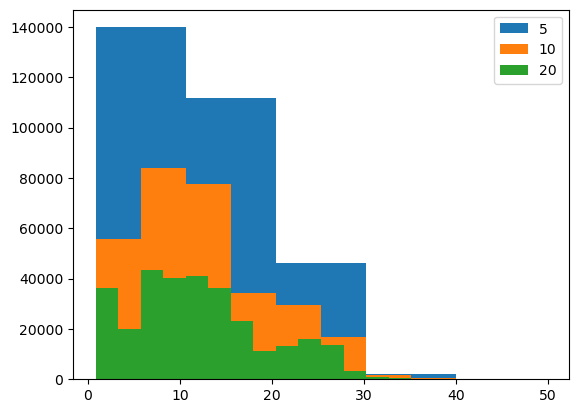

In [25]:
#4. 히스토그램 - 소요시간 분포
df_original.head(3)

plt.figure()
plt.hist(x = df_original['duration'], bins = 5)
plt.hist(x = df_original['duration'], bins = 10)
plt.hist(x = df_original['duration'], bins = 20)
plt.legend((5,10,20))
plt.show()

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  


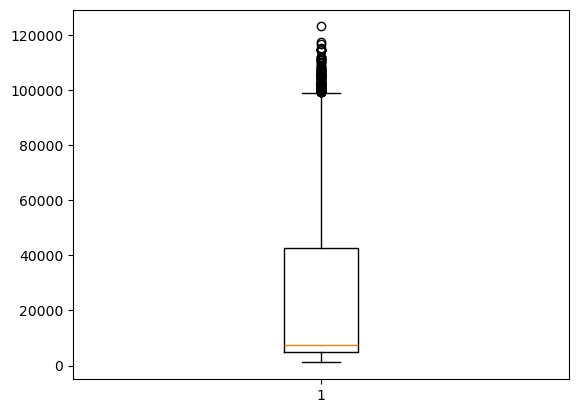

In [31]:
#5. box plot - 전체 가격 분포, 출발 시간 별 가격 분포
print(df_original.head(3))

plt.figure()
plt.boxplot(df_original['price'])
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

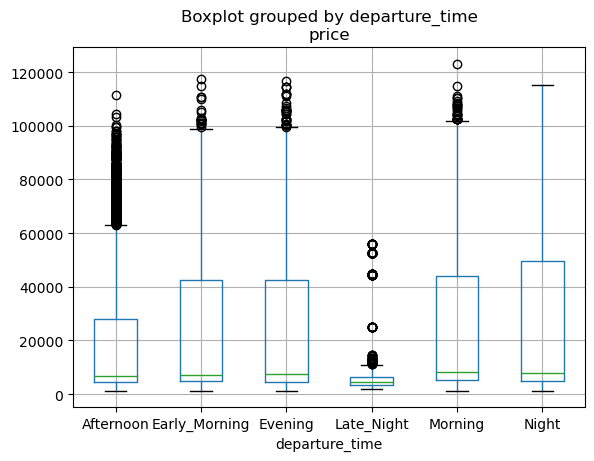

In [34]:
df_original.boxplot(column='price', by = 'departure_time')

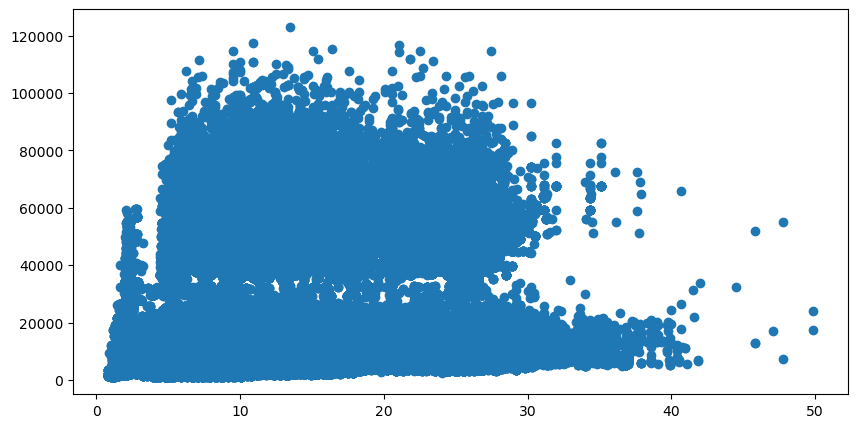

In [38]:
#6. 산점도 - 비행시간과 항공권 가격 관계

df_original.head(3)

plt.figure(figsize=(10,5))
plt.scatter(x = df_original['duration'], y = df_original['price'])
plt.show()

In [43]:
#7. 히트맵 - 각 수치변수 데이터 상관관계
df7 = df_original.select_dtypes('number')
df7 = df7.corr()

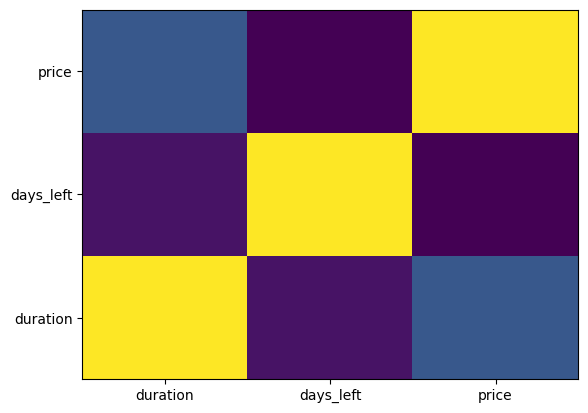

In [47]:
plt.figure()
plt.pcolor(df7)
plt.xticks([0.5, 1.5, 2.5], df7.index)
plt.yticks([0.5, 1.5, 2.5], df7.index)
plt.show()